In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import util

In [2]:
ksi_df = pd.read_csv('Data/KSI.csv')
hazardous_df = pd.read_csv('Data/Hazardous_Driving_Areas_Toronto.csv')
ksi_collapse = pd.read_csv('Data/KSI_Collapse_Count.csv', index_col = 0)
ksi_collapse_2 = pd.read_csv('Data/KSI_Collapse_Count_round2.csv', index_col = 0)

In [3]:
pd.set_option('display.max_columns', None)

In [10]:
ksi_df.head(1)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1


In [12]:
hazardous_df.head(1)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version
0,f25eun8,"POLYGON((-73.65234375 45.6948852539063, -73.65...",45.695,-73.652,45.696,-73.651,POINT(-73.65123 45.6955),45.696,-73.651,NaN,NaN,NaN,Canada,CA,0.005,7,2022-02-02,5.1


In [36]:
# ksi_collapse was rounded to 2 decimal places ONLY to create Hazardous_KSI_Merge_round2.csv
# it was rounded to 3 decimal places to create Hazardous_KSI_Merge.csv

ksi_collapse = round(ksi_collapse, 3)
ksi_collapse = round(ksi_collapse, 2)

In [37]:
# this was only run to create Hazardous_KSI_Merge_round2.csv
# there is also a Hazardous_KSI_Merge.csv where ONLY ksi_collapse was rounded to 3 decimal places

hazardous_df = round(hazardous_df, 2)

In [16]:
ksi_collapse['LATITUDE']

0       43.590289
1       43.592047
2       43.592545
3       43.592673
4       43.593039
          ...    
5340    43.853145
5341    43.854145
5342    43.854245
5343    43.855197
5344    43.855445
Name: LATITUDE, Length: 5345, dtype: float64

In [3]:
hazardous_df['Longitude'] = hazardous_df['Longitude'].apply(util.truncate, args = (3, ))
hazardous_df['Latitude'] = hazardous_df['Latitude'].apply(util.truncate, args = (3,))

In [4]:
hazardous_merge = hazardous_df.merge(ksi_collapse, left_on = ['Latitude', 'Longitude'], right_on = ['LATITUDE', 'LONGITUDE'], how = 'inner')

In [5]:
hazardous_merge.sort_values(by = 'COUNT', ascending = False)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,...,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
193,dpz8252,"POLYGON((-79.453125 43.6555480957031, -79.4517...",43.656,-79.453,43.657,-79.452,POINT(-79.45239 43.65631),43.656,-79.452,Toronto,...,Ontario,Canada,CA-ON,0.046,63,2022-02-02,5.1,43.656,-79.452,10
502,dpz3p44,"POLYGON((-79.4943237304688 43.780517578125, -7...",43.781,-79.494,43.782,-79.493,POINT(-79.4941 43.78141),43.781,-79.494,Toronto,...,Ontario,Canada,CA-ON,0.034,71,2022-02-02,5.1,43.781,-79.494,8
62,dpz9ks5,"POLYGON((-79.2512512207031 43.83544921875, -79...",43.835,-79.251,43.837,-79.250,POINT(-79.251 43.8363),43.836,-79.251,Toronto,...,Ontario,Canada,CA-ON,0.019,15,2022-02-02,5.1,43.836,-79.251,8
501,dpz3p41,"POLYGON((-79.4956970214844 43.780517578125, -7...",43.781,-79.496,43.782,-79.494,POINT(-79.4945 43.78133),43.781,-79.494,Toronto,...,Ontario,Canada,CA-ON,0.032,132,2022-02-02,5.1,43.781,-79.494,8
330,dpz8utr,"POLYGON((-79.2457580566406 43.7544250488281, -...",43.754,-79.246,43.756,-79.244,POINT(-79.24527 43.75497),43.755,-79.245,Toronto,...,Ontario,Canada,CA-ON,0.022,25,2022-02-02,5.1,43.755,-79.245,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,dpz2y1s,"POLYGON((-79.5355224609375 43.7338256835938, -...",43.734,-79.536,43.735,-79.534,POINT(-79.53506 43.73445),43.734,-79.535,Toronto,...,Ontario,Canada,CA-ON,0.005,5,2022-02-02,5.1,43.734,-79.535,1
277,dpz8f1w,"POLYGON((-79.3569946289062 43.7338256835938, -...",43.734,-79.357,43.735,-79.356,POINT(-79.3559 43.7346),43.735,-79.356,Toronto,...,Ontario,Canada,CA-ON,0.014,5,2022-02-02,5.1,43.735,-79.356,1
273,dpz952e,"POLYGON((-79.3061828613281 43.7722778320312, -...",43.772,-79.306,43.774,-79.305,POINT(-79.30536 43.77307),43.773,-79.305,Toronto,...,Ontario,Canada,CA-ON,0.035,9,2022-02-02,5.1,43.773,-79.305,1
272,dpz3n0x,"POLYGON((-79.5314025878906 43.7722778320312, -...",43.772,-79.531,43.774,-79.530,POINT(-79.53084 43.77319),43.773,-79.531,Toronto,...,Ontario,Canada,CA-ON,0.006,6,2022-02-02,5.1,43.773,-79.531,1


In [29]:
hazardous_df.groupby(['Latitude', 'Longitude'])

Latitude_SW  Longitude_SW  Latitude_NE  Longitude_NE  \
Latitude Longitude                                                         
40.47    -80.60          40.474       -80.607       40.475       -80.605   
43.59    -79.54         174.367      -318.180      174.372      -318.173   
         -79.53          43.592       -79.538       43.594       -79.537   
         -79.51          43.598       -79.519       43.599       -79.518   
43.60    -79.55         348.852      -636.463      348.863      -636.452   
...                         ...           ...          ...           ...   
43.82    -79.22          43.819       -79.221       43.820       -79.220   
43.83    -79.27          43.830       -79.276       43.831       -79.275   
         -79.25         175.332      -317.004      175.337      -317.000   
         -79.24          87.664      -158.493       87.667      -158.490   
43.85    -79.18          43.851       -79.188       43.852       -79.187   

                    SeverityScore  IncidentsTotal  Version  
Latitude Longitude                                          
40.47    -80.60             0.190              44      5.1  
43.59    -79.54             0.191              47     20.4  
         -79.53             0.022               8      5.1  
         -79.51             0.028               6      5.1  
43.60    -79.55             0.233            1419     40.8  
...                           ...             ...      ...  
43.82    -79.22             0.015               6      5.1  
43.83    -79.27             0.027              22      5.1  
         -79.25             0.064              30     20.4  
         -79.24             0.016               6     10.2  
43.85    -79.18             0.032               3      5.1  

[553 rows x 7 columns]

In [33]:
hazardous_df[(hazardous_df['Latitude'] == 43.60) & (hazardous_df['Longitude'] == -79.55)]

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version
18,dpz2jdv,"POLYGON((-79.5561218261719 43.6088562011719, -...",43.609,-79.556,43.610,-79.555,POINT(-79.55511 43.60911),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.095,598,2022-02-02,5.1
143,dpz2jd5,"POLYGON((-79.5588684082031 43.604736328125, -7...",43.605,-79.559,43.606,-79.557,POINT(-79.55874 43.60585),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.020,92,2022-02-02,5.1
159,dpz2jdk,"POLYGON((-79.5574951171875 43.6061096191406, -...",43.606,-79.557,43.607,-79.556,POINT(-79.55724 43.60725),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.008,25,2022-02-02,5.1
219,dpz2jd7,"POLYGON((-79.5588684082031 43.6061096191406, -...",43.606,-79.559,43.607,-79.557,POINT(-79.55839 43.60639),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.024,205,2022-02-02,5.1
252,dpz2jd4,"POLYGON((-79.5602416992188 43.604736328125, -7...",43.605,-79.560,43.606,-79.559,POINT(-79.55935 43.60525),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.046,350,2022-02-02,5.1
259,dpz2jdt,"POLYGON((-79.5561218261719 43.6074829101562, -...",43.607,-79.556,43.609,-79.555,POINT(-79.5555 43.6086),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.022,89,2022-02-02,5.1
320,dpz2jds,"POLYGON((-79.5574951171875 43.6074829101562, -...",43.607,-79.557,43.609,-79.556,POINT(-79.55659 43.60795),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.009,45,2022-02-02,5.1
356,dpz2jde,"POLYGON((-79.5588684082031 43.6074829101562, -...",43.607,-79.559,43.609,-79.557,POINT(-79.55815 43.60829),43.6,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.009,15,2022-02-02,5.1


In [34]:
hazardous_df_2 = hazardous_df.pivot_table(values = 'IncidentsTotal', index = ['Latitude', 'Longitude'], aggfunc = sum).reset_index()

In [35]:
hazardous_df_2 = hazardous_df_2.merge(ksi_collapse_2, left_on = ['Latitude', 'Longitude'], right_on = ['LATITUDE', 'LONGITUDE'], how = 'inner')

In [36]:
hazardous_df_2

,Latitude,Longitude,IncidentsTotal,LATITUDE,LONGITUDE,COUNT
0,43.59,-79.54,47,43.59,-79.54,4
1,43.59,-79.53,8,43.59,-79.53,11
2,43.59,-79.51,6,43.59,-79.51,6
3,43.60,-79.55,1419,43.60,-79.55,2
4,43.60,-79.54,24,43.60,-79.54,10
...,...,...,...,...,...,...
527,43.82,-79.22,6,43.82,-79.22,1
528,43.83,-79.27,22,43.83,-79.27,5
529,43.83,-79.25,30,43.83,-79.25,11
530,43.83,-79.24,6,43.83,-79.24,5


In [37]:
hazardous_df_2.sort_values(by = 'COUNT', ascending = False)

,Latitude,Longitude,IncidentsTotal,LATITUDE,LONGITUDE,COUNT
75,43.65,-79.38,441,43.65,-79.38,84
76,43.65,-79.37,241,43.65,-79.37,76
58,43.64,-79.38,1042,43.64,-79.38,61
59,43.64,-79.37,1028,43.64,-79.37,61
74,43.65,-79.39,31,43.65,-79.39,54
...,...,...,...,...,...,...
287,43.73,-79.62,153,43.73,-79.62,1
157,43.69,-79.59,79,43.69,-79.59,1
505,43.80,-79.24,54,43.80,-79.24,1
108,43.67,-79.57,191,43.67,-79.57,1


In [20]:
hazardous_merge

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
0,dpz83ht,"POLYGON((-79.4023132324219 43.6624145507812, -...",43.662,-79.402,43.664,-79.401,POINT(-79.40205 43.66305),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.080,11,2022-02-02,5.1,43.66,-79.40,29
1,dpz83jk,"POLYGON((-79.4036865234375 43.6665344238281, -...",43.667,-79.404,43.668,-79.402,POINT(-79.40293 43.66693),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.005,4,2022-02-02,5.1,43.66,-79.40,29
2,dpz83j7,"POLYGON((-79.4050598144531 43.6665344238281, -...",43.667,-79.405,43.668,-79.404,POINT(-79.40408 43.66694),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.012,6,2022-02-02,5.1,43.66,-79.40,29
3,dpz83jq,"POLYGON((-79.4009399414062 43.6665344238281, -...",43.667,-79.401,43.668,-79.400,POINT(-79.40031 43.6673),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.004,3,2022-02-02,5.1,43.66,-79.40,29
4,dpz83jm,"POLYGON((-79.4023132324219 43.6665344238281, -...",43.667,-79.402,43.668,-79.401,POINT(-79.40156 43.66716),43.66,-79.40,Toronto,NaN,Ontario,Canada,CA-ON,0.013,9,2022-02-02,5.1,43.66,-79.40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,dpz2kvs,"POLYGON((-79.5904541015625 43.6679077148438, -...",43.668,-79.590,43.669,-79.589,POINT(-79.58966 43.66889),43.66,-79.59,Toronto,NaN,Ontario,Canada,CA-ON,0.005,16,2022-02-02,5.1,43.66,-79.59,3
2877,dpz2kvw,"POLYGON((-79.5877075195312 43.6679077148438, -...",43.668,-79.588,43.669,-79.586,POINT(-79.58652 43.66868),43.66,-79.58,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.66,-79.58,8
2878,dpz2u05,"POLYGON((-79.6247863769531 43.7255859375, -79....",43.726,-79.625,43.727,-79.623,POINT(-79.62434 43.72627),43.72,-79.62,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.72,-79.62,1
2879,dpz8c20,"POLYGON((-79.398193359375 43.7255859375, -79.3...",43.726,-79.398,43.727,-79.397,POINT(-79.39722 43.7259),43.72,-79.39,Toronto,NaN,Ontario,Canada,CA-ON,0.008,7,2022-02-02,5.1,43.72,-79.39,4


In [12]:
# these two accidents occurred at the same intersection
# now with the proper procedure, collapse makes sense

ksi_collapse.loc[[1393,1394]]

,LATITUDE,LONGITUDE,COUNT
1393,43.676,-79.361,1
1394,43.676,-79.358,6


In [34]:
# since I collapsed KSI without rounding/truncating, once truncated
# these two locations appear as duplicates

# Fixed - truncated ksi before collapsing

ksi_collapse[(ksi_collapse['LATITUDE'] == 43.663) & (ksi_collapse['LONGITUDE'] == -79.402)]

,LATITUDE,LONGITUDE,COUNT
1393,43.663,-79.402,2
1394,43.663,-79.402,2


In [16]:
hazardous_merge.sort_values(by = 'SeverityScore', ascending = False)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
73,dpz881k,"POLYGON((-79.4476318359375 43.6885070800781, -...",43.689,-79.448,43.690,-79.446,POINT(-79.44747 43.68892),43.689,-79.447,Toronto,NaN,Ontario,Canada,CA-ON,0.257,134,2022-02-02,5.1,43.689,-79.447,2
306,dpz8b6p,"POLYGON((-79.4325256347656 43.736572265625, -7...",43.737,-79.433,43.738,-79.431,POINT(-79.43205 43.73685),43.737,-79.432,Toronto,NaN,Ontario,Canada,CA-ON,0.148,1916,2022-02-02,5.1,43.737,-79.432,2
425,dpz885b,"POLYGON((-79.453125 43.7022399902344, -79.4517...",43.702,-79.453,43.704,-79.452,POINT(-79.45213 43.70282),43.703,-79.452,Toronto,NaN,Ontario,Canada,CA-ON,0.142,138,2022-02-02,5.1,43.703,-79.452,3
216,dpz2gus,"POLYGON((-79.6343994140625 43.7503051757813, -...",43.750,-79.634,43.752,-79.633,POINT(-79.63349 43.75126),43.751,-79.633,Toronto,NaN,Ontario,Canada,CA-ON,0.123,150,2022-02-02,5.1,43.751,-79.633,1
114,dpz2jgc,"POLYGON((-79.5506286621094 43.6143493652344, -...",43.614,-79.551,43.616,-79.549,POINT(-79.55003 43.61549),43.615,-79.550,Toronto,NaN,Ontario,Canada,CA-ON,0.107,803,2022-02-02,5.1,43.615,-79.550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,dpz8679,"POLYGON((-79.3528747558594 43.6569213867188, -...",43.657,-79.353,43.658,-79.351,POINT(-79.35266 43.65747),43.657,-79.353,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.657,-79.353,1
565,dpz2mjx,"POLYGON((-79.5753479003906 43.6679077148438, -...",43.668,-79.575,43.669,-79.574,POINT(-79.57446 43.66894),43.669,-79.574,Toronto,NaN,Ontario,Canada,CA-ON,0.001,8,2022-02-02,5.1,43.669,-79.574,1
174,dpz80pz,"POLYGON((-79.4435119628906 43.6363220214844, -...",43.636,-79.444,43.638,-79.442,POINT(-79.443 43.63649),43.636,-79.443,Toronto,NaN,Ontario,Canada,CA-ON,0.001,6,2022-02-02,5.1,43.636,-79.443,1
296,dpz8d6g,"POLYGON((-79.3501281738281 43.6967468261719, -...",43.697,-79.350,43.698,-79.349,POINT(-79.3494 43.69796),43.698,-79.349,Toronto,NaN,Ontario,Canada,CA-ON,0.001,3,2022-02-02,5.1,43.698,-79.349,3


In [21]:
hazardous_merge.sort_values(by = 'COUNT', ascending = False)

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,SeverityScore,IncidentsTotal,UpdateDate,Version,LATITUDE,LONGITUDE,COUNT
1333,dpz83d3,"POLYGON((-79.3858337402344 43.6500549316406, -...",43.650,-79.386,43.651,-79.384,POINT(-79.38512 43.65053),43.65,-79.38,Toronto,NaN,Ontario,Canada,CA-ON,0.014,16,2022-02-02,5.1,43.65,-79.38,84
1332,dpz83d2,"POLYGON((-79.38720703125 43.6500549316406, -79...",43.650,-79.387,43.651,-79.386,POINT(-79.38649 43.65069),43.65,-79.38,Toronto,NaN,Ontario,Canada,CA-ON,0.039,124,2022-02-02,5.1,43.65,-79.38,84
1308,dpz836z,"POLYGON((-79.3885803222656 43.6528015136719, -...",43.653,-79.389,43.654,-79.387,POINT(-79.38759 43.65326),43.65,-79.38,Toronto,NaN,Ontario,Canada,CA-ON,0.012,12,2022-02-02,5.1,43.65,-79.38,84
1309,dpz837n,"POLYGON((-79.3899536132812 43.6541748046875, -...",43.654,-79.390,43.656,-79.389,POINT(-79.38884 43.6551),43.65,-79.38,Toronto,NaN,Ontario,Canada,CA-ON,0.010,8,2022-02-02,5.1,43.65,-79.38,84
1310,dpz837p,"POLYGON((-79.3885803222656 43.6541748046875, -...",43.654,-79.389,43.656,-79.387,POINT(-79.38816 43.65486),43.65,-79.38,Toronto,NaN,Ontario,Canada,CA-ON,0.020,39,2022-02-02,5.1,43.65,-79.38,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,dpz2wrj,"POLYGON((-79.5231628417969 43.7200927734375, -...",43.720,-79.523,43.721,-79.522,POINT(-79.52218 43.72087),43.72,-79.52,Toronto,NaN,Ontario,Canada,CA-ON,0.008,98,2022-02-02,5.1,43.72,-79.52,1
1099,dpz2wrn,"POLYGON((-79.5217895507812 43.7200927734375, -...",43.720,-79.522,43.721,-79.520,POINT(-79.52162 43.7203),43.72,-79.52,Toronto,NaN,Ontario,Canada,CA-ON,0.003,10,2022-02-02,5.1,43.72,-79.52,1
1098,dpz2wqy,"POLYGON((-79.5217895507812 43.7187194824219, -...",43.719,-79.522,43.720,-79.520,POINT(-79.52121 43.7195),43.72,-79.52,Toronto,NaN,Ontario,Canada,CA-ON,0.011,120,2022-02-02,5.1,43.72,-79.52,1
1097,dpz2y2e,"POLYGON((-79.5259094238281 43.7283325195312, -...",43.728,-79.526,43.730,-79.525,POINT(-79.52478 43.72899),43.72,-79.52,Toronto,NaN,Ontario,Canada,CA-ON,0.005,28,2022-02-02,5.1,43.72,-79.52,1


In [6]:
hazardous_merge.to_csv('Hazardous_KSI_Merge.csv')

In [38]:
hazardous_df_2.to_csv('Hazardous_KSI_Merge_round2.csv')

<AxesSubplot:xlabel='COUNT', ylabel='IncidentsTotal'>

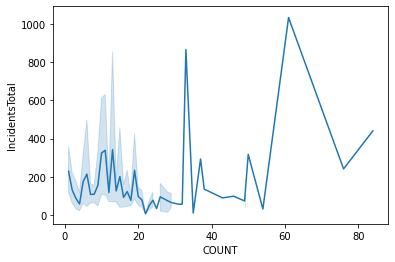

In [39]:
sns.lineplot(data = hazardous_df_2, y = 'IncidentsTotal', x = 'COUNT')